# Stock : LQ45 Fundamental Analysis & Technical Analysis Tools

***by Budi Prayoga***

[Linkedin](https://www.linkedin.com/in/budipryg/) <br>
[Github](https://github.com/budipryg) <br>

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import mplfinance as mpf
import talib as tl
%matplotlib inline

About yfinanace library : [yfinanace](https://pypi.org/project/yfinance/) <br>
About Ta-lib library : [talib](https://mrjbq7.github.io/ta-lib/index.html) <br>
About mplfinance library : [mplfinanace](https://github.com/matplotlib/mplfinance) <br>

## Load Ticker

In [2]:
# import lq45 ticker
lq45_list = pd.read_excel('lq45_ticker.xlsx',sheet_name='Sheet1')

In [3]:
# check the head
lq45_list.head()

,Ticker,yfinance Ticker,Company Name,Sector
0,ADHI,ADHI.JK,Adhi Karya (Persero) Tbk. [S],"Building Construction, 62"
1,ADRO,ADRO.JK,Adaro Energy Tbk [S],"Coal Mining, 21"
2,AKRA,AKRA.JK,AKR Corporindo Tbk. [S],"Wholesale (Durable and Non-Durable Goods), 91"
3,ANTM,ANTM.JK,Aneka Tambang Tbk. [S],"Metal and Mining, 23"
4,ASII,ASII.JK,Astra International Tbk. [S],"Automotive and Components, 42"


## Fundamental Analysis

In [5]:
# get lq45 ticker from yfinanace
symbols_string = ' '.join(list(lq45_list['yfinance Ticker']))
lq45_tickers = yf.Tickers(symbols_string)

In [6]:
def pick_ticker(symbol):
    return lq45_tickers.tickers[list(lq45_list['yfinance Ticker']).index(symbol)]

In [7]:
fund_col = ['Ticker','Company Name','Sector','Industry','latestPrice (IDR)','marketCap (Trillion IDR)','PBVR','Profit Margins (%)','Dividend Yield (%)']
fund_data = pd.DataFrame(columns=fund_col)

for ticker in list(lq45_list['yfinance Ticker']):
    info_ticker = pick_ticker(ticker).info
    if info_ticker['marketCap'] != None:
        marketCap = info_ticker['marketCap']/1000000000000
    else:
        marketCap = None
    
    if info_ticker['bookValue'] != None:
        if info_ticker['bookValue'] < 1:
            PBVR = info_ticker['previousClose']/(info_ticker['bookValue']*14000)
        else:
            PBVR = info_ticker['previousClose']/info_ticker['bookValue']
    else:
        PBVR = None
    
    if info_ticker['profitMargins'] != None:
        netProfit = info_ticker['profitMargins']*100
    else:
        netProfit = None
    
    if info_ticker['dividendYield'] != None:
        dividendYield = info_ticker['dividendYield']*100
    else:
        dividendYield = None
        
    fund_data = fund_data.append(pd.Series([
                ticker,
                info_ticker['shortName'],
                info_ticker['sector'],
               info_ticker['industry'],
               float(info_ticker['previousClose']),
               marketCap,
               PBVR,
               netProfit,
               dividendYield],index=fund_col),
                ignore_index=True)

fund_data

,Ticker,Company Name,Sector,Industry,latestPrice (IDR),marketCap (Trillion IDR),PBVR,Profit Margins (%),Dividend Yield (%)
0,ADHI.JK,Adhi Karya (Persero) Tbk.,Industrials,Engineering & Construction,1815.0,6.017836,1.161746,2.212000,1.03
1,ADRO.JK,Adaro Energy Tbk.,Energy,Thermal Coal,1410.0,43.181098,0.883459,3.901000,8.12
2,AKRA.JK,AKR Corporindo Tbk.,Energy,Oil & Gas Refining & Marketing,3290.0,12.355456,1.525487,3.998000,3.19
3,ANTM.JK,Aneka Tambang Tbk.,Basic Materials,Other Industrial Metals & Mining,3090.0,13.845485,3.922788,1.481000,0.1
4,ASII.JK,Astra International Tbk.,Consumer Cyclical,Auto Parts,6800.0,271.240103,1.779186,10.436000,2.75
5,ASRI.JK,Alam Sutera Realty Tbk.,Real Estate,Real Estate Services,248.0,4.597960,0.521804,-6.861000,None
6,BBCA.JK,Bank Central Asia Tbk.,Financial Services,Banks—Regional,35375.0,872.787015,4.871677,42.501000,1.56
7,BBNI.JK,Bank Negara Indonesia (Persero),Financial Services,Banks—Regional,6425.0,116.897601,1.084097,23.903000,3.29
8,BBRI.JK,Bank Rakyat Indonesia (Persero),Financial Services,Banks—Regional,4790.0,578.648394,3.055069,30.631000,3.56
9,BBTN.JK,Bank Tabungan Negara (Persero),Financial Services,Banks—Regional,1860.0,19.062000,1.118158,6.636000,0.11


In [38]:
from matplotlib.gridspec import GridSpec

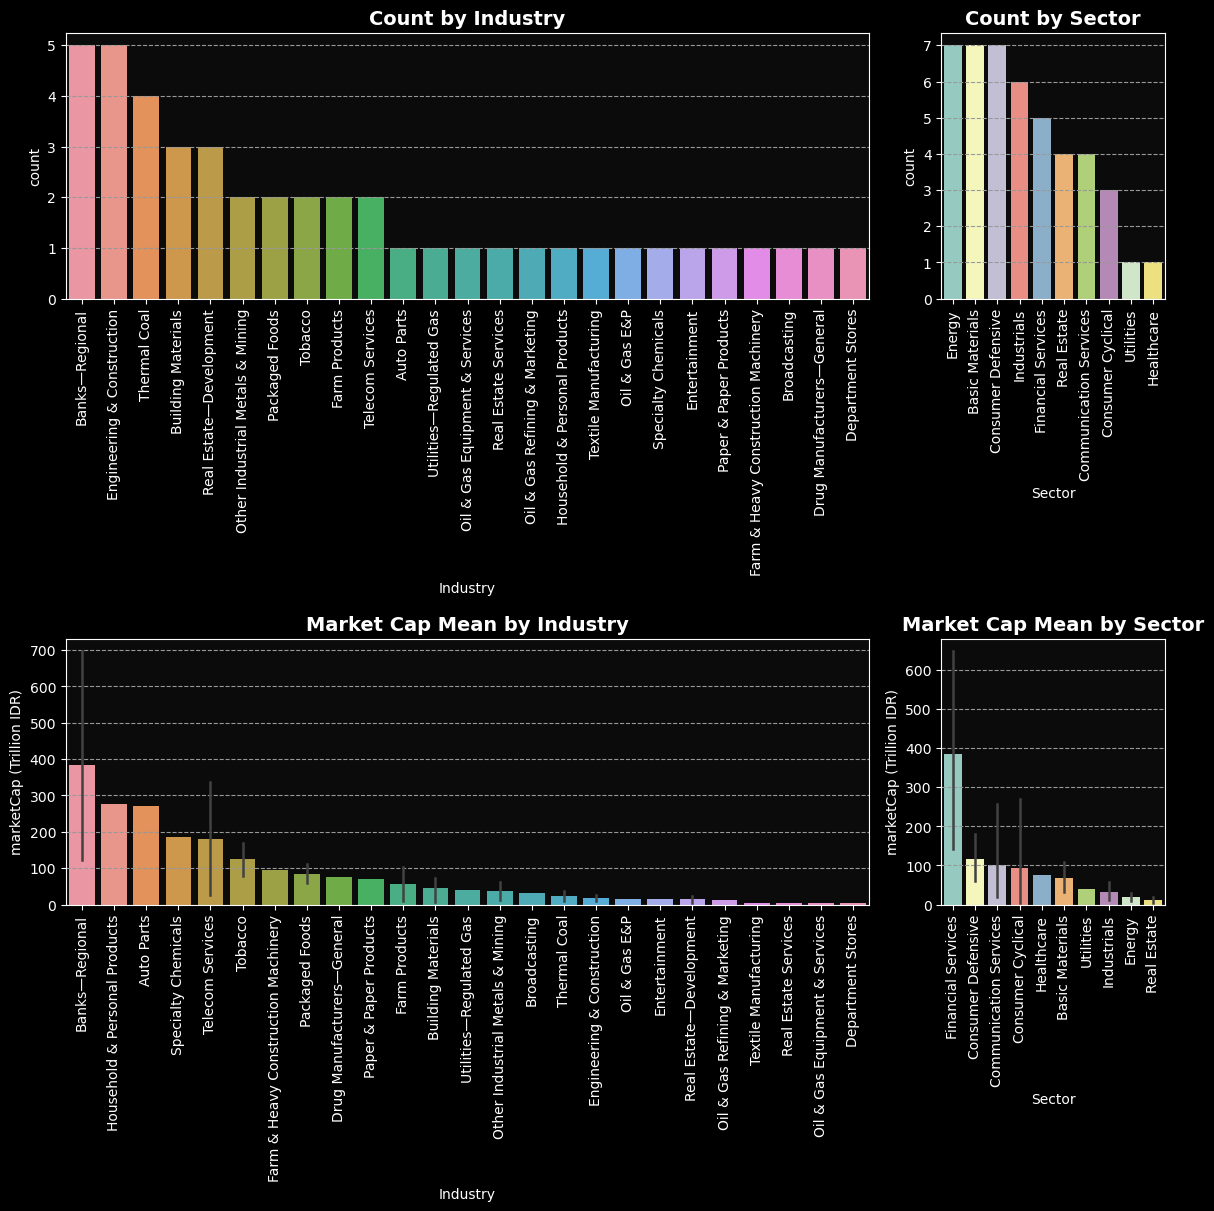

In [78]:
# count and get marketcap mean by sector and industry
fig1 = plt.figure(constrained_layout=True,figsize=(12,12))
gs = GridSpec(2,3,figure=fig1)
ax1 = fig1.add_subplot(gs[0,:2])
ax2 = fig1.add_subplot(gs[0,2:])
ax3 = fig1.add_subplot(gs[1,:2])
ax4 = fig1.add_subplot(gs[1,2:])
sns.countplot(fund_data['Industry'],order=fund_data['Industry'].value_counts().index,ax=ax1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_title('Count by Industry',fontweight='bold',fontsize=14)
sns.countplot(fund_data['Sector'],order=fund_data['Sector'].value_counts().index,ax=ax2)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_title('Count by Sector',fontweight='bold',fontsize=14)
sns.barplot(x='Industry',y='marketCap (Trillion IDR)',data=fund_data,estimator=np.mean,ax=ax3,order=fund_data.groupby('Industry').mean()['marketCap (Trillion IDR)'].sort_values(ascending=False).index)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
ax3.set_title('Market Cap Mean by Industry',fontweight='bold',fontsize=14)
sns.barplot(x='Sector',y='marketCap (Trillion IDR)',data=fund_data,estimator=np.mean,ax=ax4,order=fund_data.groupby('Sector').mean()['marketCap (Trillion IDR)'].sort_values(ascending=False).index)
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)
ax4.set_title('Market Cap Mean by Sector',fontweight='bold',fontsize=14)
plt.show()

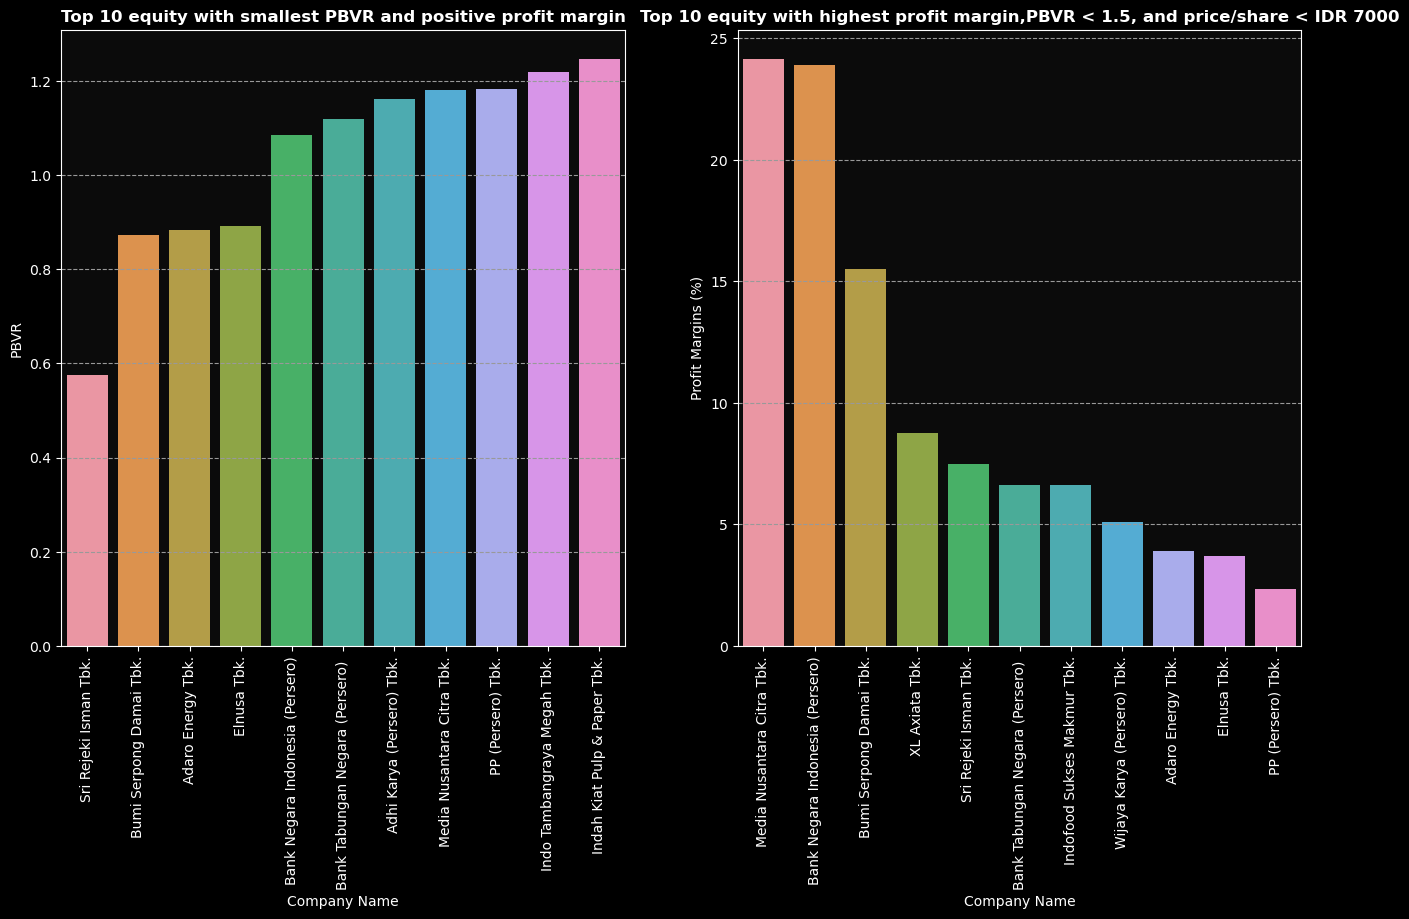

In [119]:
# get top 10 pbvr and top 10 profit margin
top_10_pbvr = []
top_10_profit = []
fig2, ax = plt.subplots(1,2,figsize=(16,8))
sns.barplot(x='Company Name',y='PBVR',data=fund_data[fund_data['Profit Margins (%)']>0].sort_values(by='PBVR',ascending=True)[:11],ax=fig2.axes[0])
for tick in fig2.axes[0].get_xticklabels():
    top_10_pbvr.append(tick.get_text())
    tick.set_rotation(90)
fig2.axes[0].set_title('Top 10 equity with smallest PBVR and positive profit margin',fontsize=12,fontweight='bold')
sns.barplot(x='Company Name',y='Profit Margins (%)',data=fund_data[(fund_data['PBVR']<1.5) & (fund_data['latestPrice (IDR)']<=7000)].sort_values(by='Profit Margins (%)',ascending=False)[:11],ax=fig2.axes[1])
for tick in fig2.axes[1].get_xticklabels():
    top_10_profit.append(tick.get_text())
    tick.set_rotation(90)
fig2.axes[1].set_title('Top 10 equity with highest profit margin,PBVR < 1.5, and price/share < IDR 7000',fontsize=12,fontweight='bold')
plt.show()

In [122]:
# recommendation by two plot above
pd.DataFrame(list(set(top_10_pbvr) & set(top_10_profit)),columns=['Equity Recommendation'])

,Equity Recommendation
0,Adaro Energy Tbk.
1,Bank Negara Indonesia (Persero)
2,Media Nusantara Citra Tbk.
3,Elnusa Tbk.
4,PP (Persero) Tbk.
5,Sri Rejeki Isman Tbk.
6,Bumi Serpong Damai Tbk.
7,Bank Tabungan Negara (Persero)


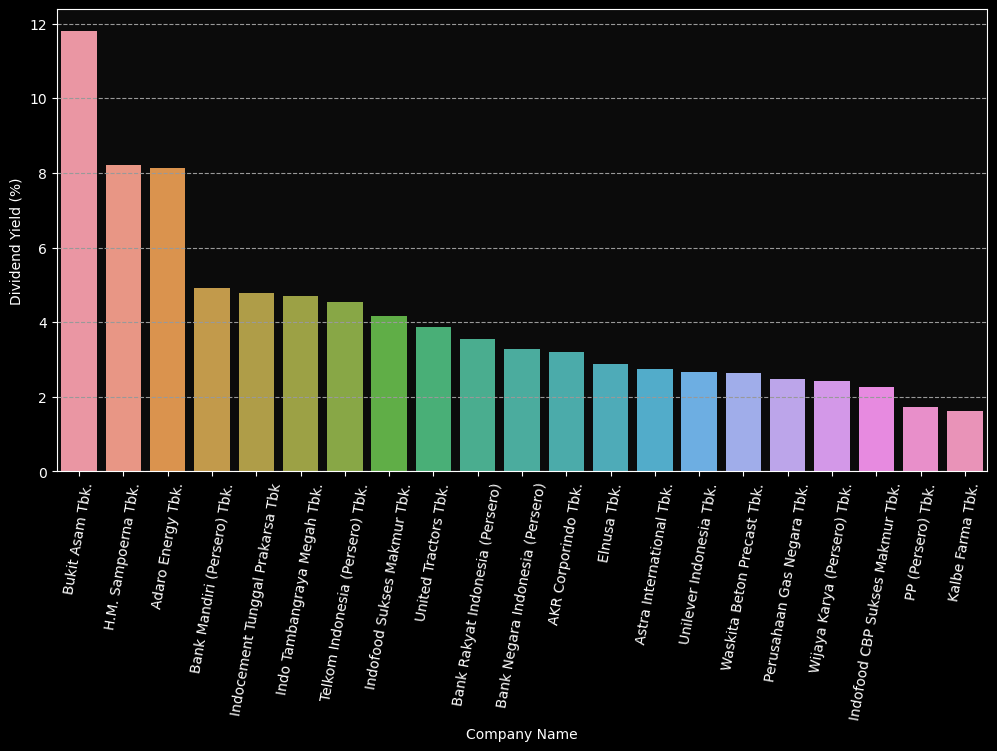

In [130]:
# recommendation by devidend
plt.figure(figsize=(12,6))
sns.barplot(x='Company Name',y='Dividend Yield (%)',data=fund_data.sort_values(by='Dividend Yield (%)',ascending=False)[:21])
plt.xticks(rotation=80)
plt.show()

## Techincal Analysis

In [27]:
# create function that generate technical analysis plot
def tech_plot(symbol='ADRO.JK',period=90):
    eq_ticker = yf.Ticker(symbol)
    eq_hist = eq_ticker.history(period='max',actions=False)

    open = eq_hist['Open']
    close = eq_hist['Close']
    high = eq_hist['High']
    low = eq_hist['Low']
    volume = eq_hist['Volume']

    macd, macdsignal, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    roc = tl.ROC(close, timeperiod=10)
    rsi = tl.RSI(close, timeperiod=14)
    slowk, slowd = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    upperband, middleband, lowerband = tl.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    ema_12 = tl.EMA(close, timeperiod=12)
    ema_26 = tl.EMA(close, timeperiod=26)
    # fastk, fastd = tl.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
    # chaikin_ad_osci = tl.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
    # obv = tl.OBV(close, volume)
    # natr = tl.NATR(high, low, close, timeperiod=14)
    # cdl2crows = tl.CDL2CROWS(open, high, low, close)
    indicator_bundle = pd.concat([macd, macdsignal, macdhist,roc,rsi,slowk,slowd,upperband,middleband,lowerband,ema_12,ema_26],axis=1)
    indicator_bundle.rename(columns={0:'macd',1:'macdsignal',2:'macdhist',3:'roc',4:'rsi',5:'slowk',6:'slowd',7:'bband_upper',8:'bband_middle',9:'bband_lower',10:'ema_12',11:'ema_26'},inplace=True)
    eq_hist = pd.concat([eq_hist,indicator_bundle],axis=1)

    apds = [
            mpf.make_addplot(eq_hist['bband_upper'].tail(period),color='cyan',linestyle='--'),
            mpf.make_addplot(eq_hist['bband_lower'].tail(period),color='yellow',linestyle='--'),
            mpf.make_addplot(eq_hist['ema_12'].tail(period),color='lime'),
            mpf.make_addplot(eq_hist['ema_26'].tail(period),color='red'),
            mpf.make_addplot(eq_hist['macdhist'].tail(period),type='bar',width=0.7,panel=2,
                             color='lightgray',alpha=1,secondary_y=False,ylabel='MACD'),
            mpf.make_addplot(eq_hist['macd'].tail(period),panel=2,color='fuchsia',secondary_y=True),
            mpf.make_addplot(eq_hist['macdsignal'].tail(period),panel=2,color='b',secondary_y=True),
            mpf.make_addplot(eq_hist['rsi'].tail(period),panel=3,color='y',ylabel='RSI'),
            mpf.make_addplot(eq_hist['slowk'].tail(period),panel=4,color='b',ylabel='Stochastic\nSlow'),
            mpf.make_addplot(eq_hist['slowd'].tail(period),panel=4,color='r'),
            mpf.make_addplot(eq_hist['roc'].tail(period),panel=5,color='white',ylabel='ROC'),
           ]

    mpf.plot(eq_hist.tail(period),type='candle',volume=True,addplot=apds,figscale=3,figratio=(1,1),volume_panel=1,panel_ratios=(5,2,2,2,2,2),style='nightclouds')

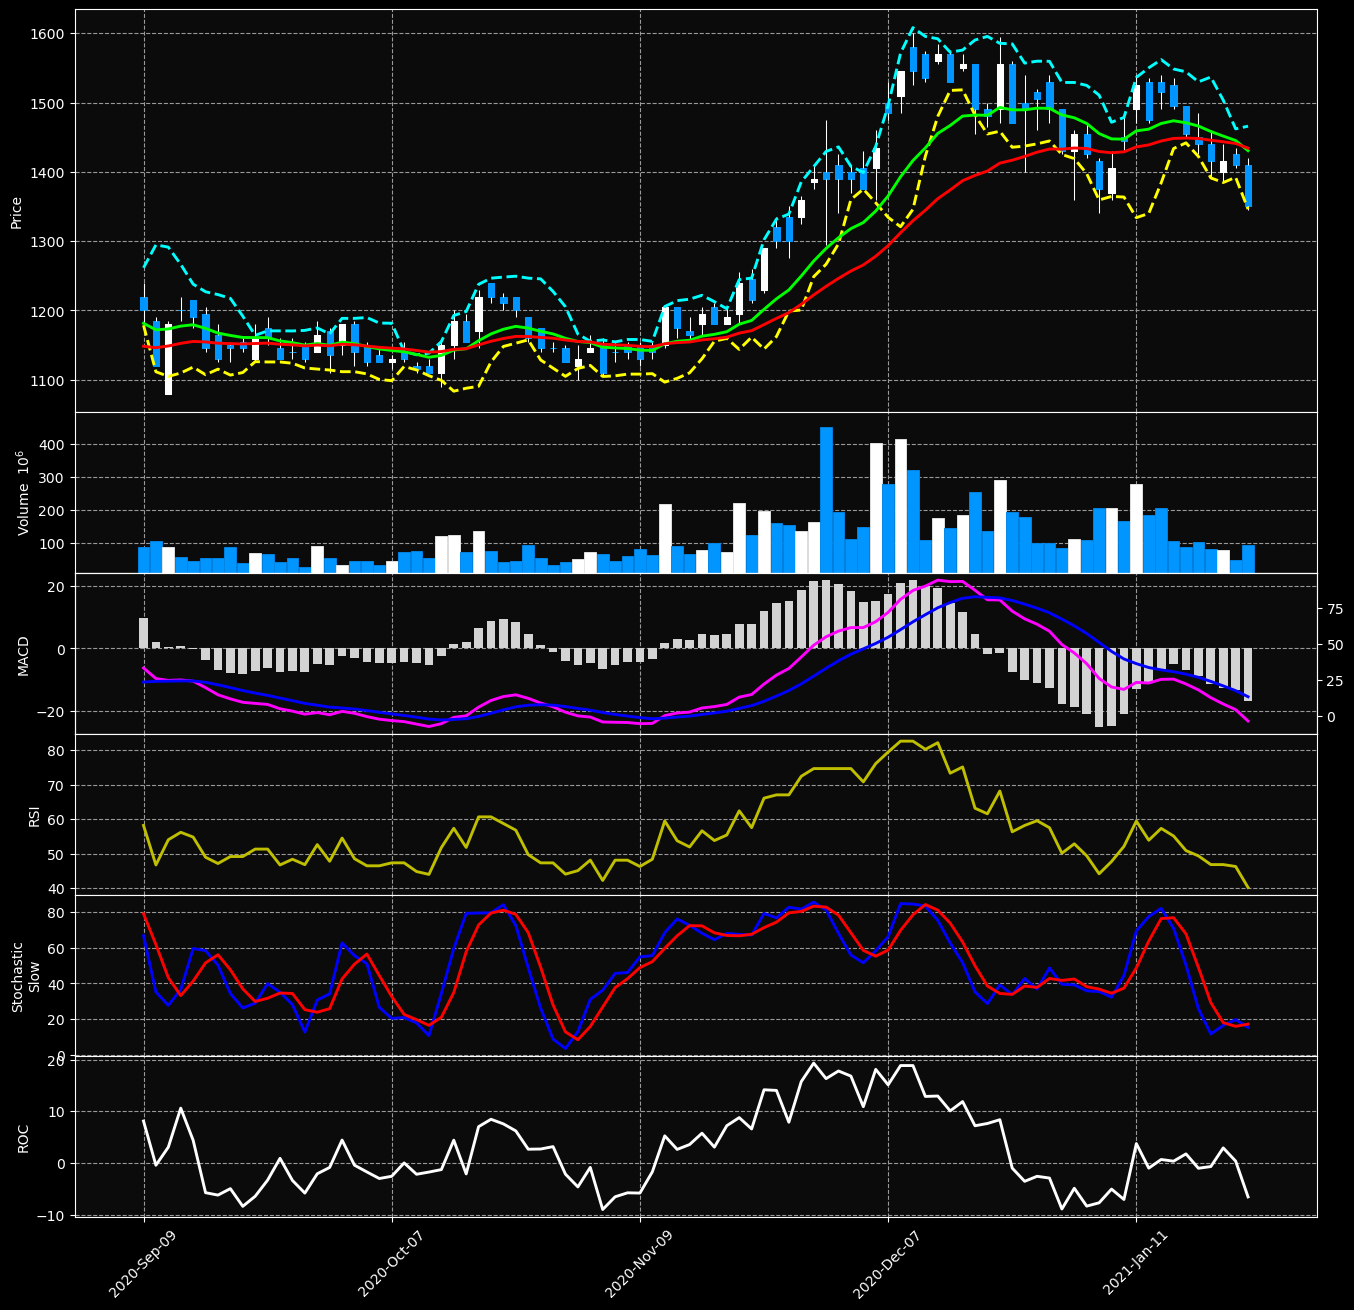

In [28]:
tech_plot()

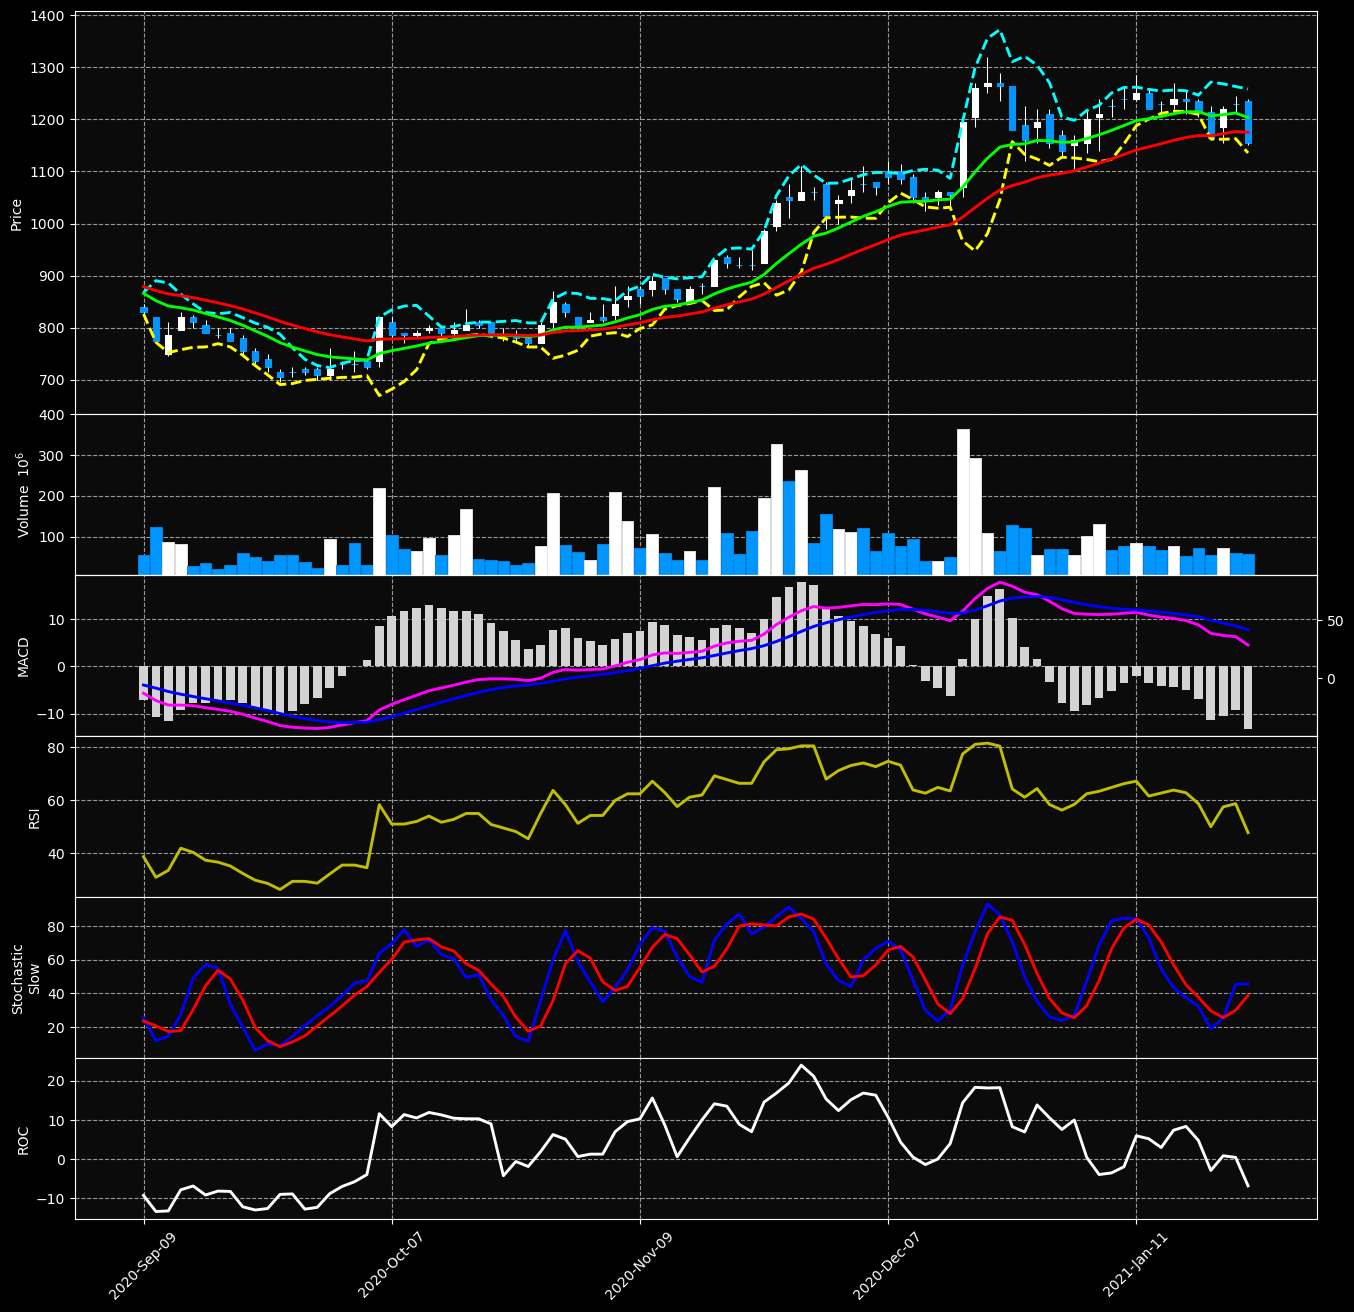

In [29]:
tech_plot('MNCN.JK')

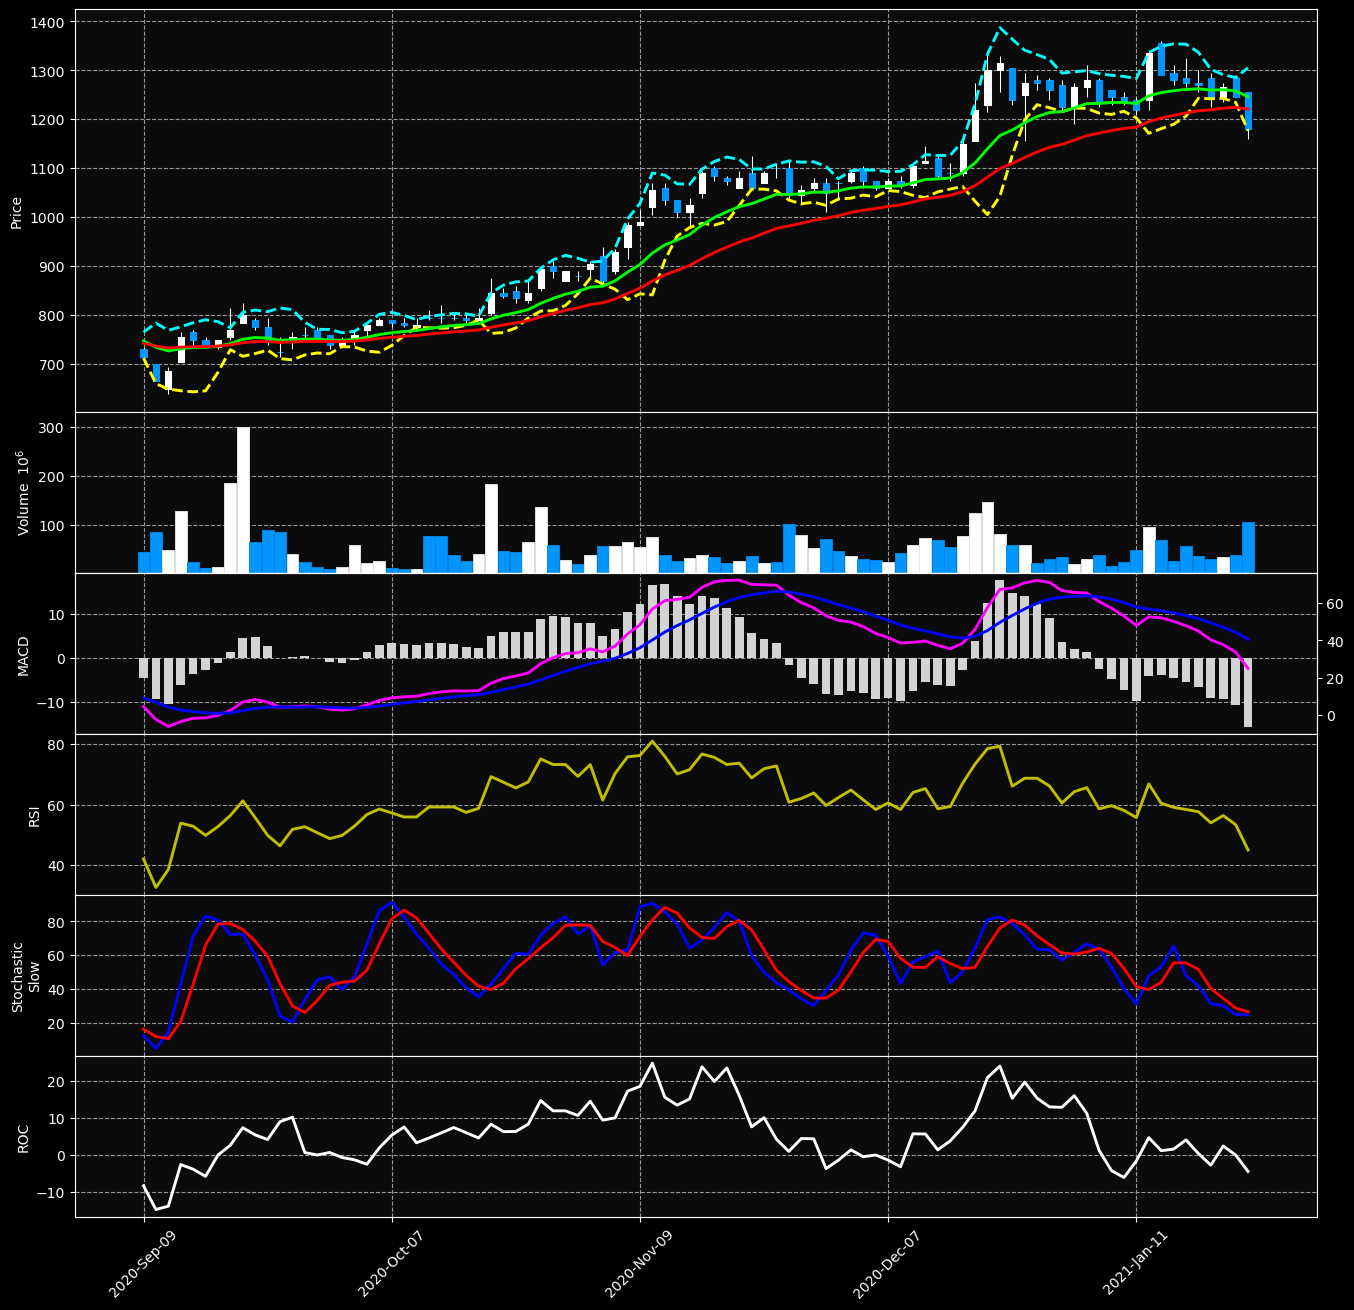

In [131]:
tech_plot('BSDE.JK')